In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
CombinedCityRide_df = pd.merge(ridedata, citydata, how='outer', on='city')
# Display the data table for preview
CombinedCityRide_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
TotalFare = CombinedCityRide_df['fare'].sum()
print (TotalFare)

63538.64


In [3]:
######################################################
cityGroup = CombinedCityRide_df.groupby('city')
print(cityGroup)
citycount = cityGroup['type'].value_counts()

#citytype = UrbanGroup['type'].count()
drivercount = cityGroup['driver_count'].sum().reset_index()
averagefare = cityGroup['fare'].mean().reset_index()
data_df = pd.DataFrame(citycount)
data_df = data_df.rename(columns={'type': "citycount"})
data_df = data_df.reset_index('type')
data_df = data_df.merge(drivercount, on='city').set_index('city')
data_df = data_df.merge(averagefare, on='city')
data_df = data_df.set_index('type')
data_df

,city,citycount,driver_count,fare
type,,,,
Urban,Amandaburgh,18,216,24.641667
Urban,Barajasview,22,572,25.332273
Suburban,Barronchester,16,176,36.422500
Suburban,Bethanyland,18,396,32.956111
Rural,Bradshawfurt,10,70,40.064000
Suburban,Brandonfort,19,190,35.437368
Urban,Carriemouth,27,1404,28.314444
Urban,Christopherfurt,27,1107,24.501852
Suburban,Colemanland,22,506,30.894545


In [4]:
#Group each city type
Urbantype = 'Urban'
justUrban = data_df.loc[Urbantype]
justUrban

Suburbantype = 'Suburban'
justSuburban = data_df.loc[Suburbantype]
justSuburban

Ruraltype = 'Rural'
justRural = data_df.loc[Ruraltype]
justRural

,city,citycount,driver_count,fare
type,,,,
Rural,Bradshawfurt,10,70,40.064000
Rural,Garzaport,3,21,24.123333
Rural,Harringtonfort,6,24,33.470000
Rural,Jessicaport,6,6,36.013333
Rural,Lake Jamie,6,24,34.358333
Rural,Lake Latoyabury,11,22,26.061818
Rural,Michaelberg,12,72,34.997500
Rural,New Ryantown,6,12,43.278333
Rural,Newtonview,4,4,36.745000


<function matplotlib.pyplot.show(*args, **kw)>

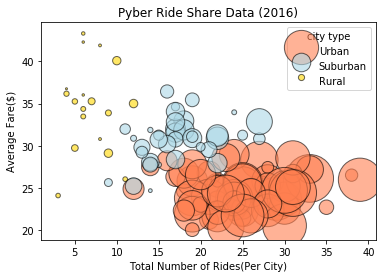

In [27]:
# Obtain the x and y coordinates for each of the three city types



#for color in city 
colors = ['Gold', 'LightSkyBlue', 'LightCoral']

# Build the scatter plots for each city types
plt.scatter(justUrban['citycount'], justUrban['fare'], justUrban['driver_count'], color='coral', marker='o', alpha=.6, edgecolor='black')
plt.scatter(justSuburban['citycount'], justSuburban['fare'], justSuburban['driver_count'], color='lightblue', marker='o', alpha=.6, edgecolor='black')
plt.scatter(justRural['citycount'], justRural['fare'], justRural['driver_count'], color='gold', marker='o', alpha=.6, edgecolor='black')

# Incorporate the other graph properties
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number of Rides(Per City)')
plt.title('Pyber Ride Share Data (2016)')
# Create a legend
plt.legend(['Urban', 'Suburban', 'Rural'], loc='best', title='city type', scatteryoffsets=[1])

# Incorporate a text label regarding circle size


plt.show


# Save Figure

## Bubble Plot of Ride Sharing Data

In [6]:
# Show plot
plt.show()


## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

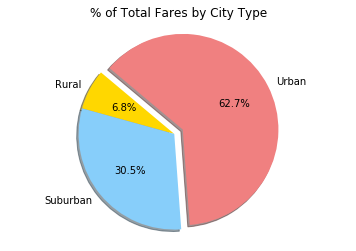

In [18]:
# Calculate Type Percents
TypeGroup = CombinedCityRide_df.groupby('type')
print(TypeGroup)
FareCounts= TypeGroup['fare'].count().reset_index()
FareCounts= FareCounts.rename(columns = {"fare": "Total Fare Count"})
FareSum = TypeGroup[['fare']].sum()
FareSum = FareSum.rename(columns = {"fare": "Fare Total Sum"})


Fare_df= pd.DataFrame(FareCounts)
Fare_df= Fare_df.merge(FareSum, on='type')
Fare_df

FarePrecentage = (FareSum/TotalFare*100)
FarePrecentage

# Build Pie Chart
explode = (0,0,0.1)
colors = ['Gold', 'LightSkyBlue', 'LightCoral']
labels = Fare_df['type']
plt.pie(FarePrecentage['Fare Total Sum'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Fares by City Type')

# Save Figure


In [8]:
# Show Figure
plt.show()
CombinedCityRide_df.head()
TotalRide = CombinedCityRide_df['ride_id'].count()
print(TotalRide)

2375


## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

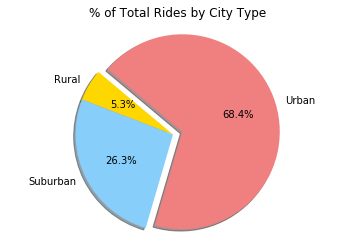

In [9]:
# Calculate Ride Percents
TypeGroup = CombinedCityRide_df.groupby('type')
print(TypeGroup)
RideCount = TypeGroup['ride_id'].count()
Ride_df = pd.DataFrame(RideCount)
Ride_df
RidePrecentage = (RideCount/TotalRide*100)
RidePrecentage

# Build Pie Chart
explode = (0,0,0.1)
colors = ['Gold', 'LightSkyBlue', 'LightCoral']
labels = Fare_df['type']
plt.pie(RidePrecentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Rides by City Type')


# Save Figure


In [10]:
# Show Figure
plt.show()
CombinedCityRide_df.head()
TotalDriver = CombinedCityRide_df['driver_count'].sum()
print(TotalDriver)

68709


## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

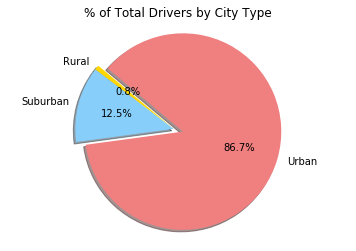

In [11]:
# Calculate Driver Percents
TypeGroup = CombinedCityRide_df.groupby('type')
print(TypeGroup)
DriverCount = TypeGroup['driver_count'].sum()
Driver_df = pd.DataFrame(DriverCount)
Driver_df
DriverPrecentage = (DriverCount/TotalDriver*100)
DriverPrecentage

# Build Pie Chart
explode = (0,0,0.1)
colors = ['Gold', 'LightSkyBlue', 'LightCoral']
labels = Fare_df['type']
plt.pie(DriverPrecentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')

# Save Figure


In [12]:
# Show Figure
plt.show()